# <center> EP01 - Visão e processamento de imagens </center>
<center> 
Bruna Lobato 10666972 <br>
Felipe Castro de Noronha 10737032 <br>
Felipe Castro de Noronha 10737032 <br>
</center>

## Introdução

Este notebook é responsavel acessar a base de dados. Você pode conferir todas as imagens que constituem a base de dados no [GitHub do projeto](https://).

Além disso, geramos tabelas sumaria de dados junto com uma vizualização de imagens semelhante a oferecida no MNIST.

## Importanto a base da dados

Os blocos a seguir são responsaveis por importar a base de dados.

In [1]:
# monta arquivos a partir do Github
# !git clone ... tmp
# !mv -v tmp/* .
# !rm tmp

In [1]:
# monta arquivos a partir do Drive
from google.colab import drive

drive.mount('/content/drive')
!cp -a /content/drive/Shareddrives/visao-e-processamento-de-imagens/. .
drive.flush_and_unmount()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/Shareddrives/visao-e-processamento-de-imagens/./utilitario.ipynb': No such file or directory


## Tabelas sumarias de dados

Abaixo apresentamos informações sobre a base dados atravez de tabelas sumarias de dados.

Incorporamos os metadados das imagens nos proprios nomes dos arquivos, assim temos a seguinte nomeclatura `classe_numero-objeto_fundo_{dia|noite}_{dentro|fora}_repeticao.png`.

In [57]:
from PIL import ImageOps, Image
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

IMAGES_PATH = './imagens'

### Tabela Global Sumária

In [54]:
classes = set()
image_count = 0
base_size = 0
images_size = set()

for path, dirs, files in os.walk(IMAGES_PATH):
    for file in files:
        file_path = os.path.join(path, file)
        width, height = images.append(ImageOps.exif_transpose(file_path)).size

        classes.add(file.split('_')[0])
        image_count += 1
        base_size += os.path.getsize(file_path)
        images_size.add((width, height))

data = []
data.append(['Número de classes', len(classes)])
data.append(['Número de imagens', image_count])
data.append(['Tamanho da base (bytes)', base_size])
data.append(['Resolução das imagens', list(images_size)])

pd.DataFrame(data, columns=['Descrição', 'Valor'])

,Descrição,Valor
0,Número de classes,3
1,Número de imagens,396
2,Tamanho da base (bytes),2359444880
3,Resolução das imagens,"[(3000, 4000), (4000, 3000)]"


### Tabela detalhada por classe

In [55]:
data = {}
for c in classes:
    data[c] = [c, 0, set(), set(), 0, 0]

# `classe _ numero-objeto _ fundo _ {dia|noite} _ {dentro|fora} _ repeticao.png`.

for path, dirs, files in os.walk(IMAGES_PATH):
    for file in files:
        file_path = os.path.join(path, file)
        file_attr = file.split('_')
        
        c = file_attr[0]
        obj_number = int(file_attr[1])
        rep_number = int(file_attr[5][0])

        if data[c][1] < obj_number: data[c][1] = obj_number
        data[c][2].add(file_attr[2])
        data[c][3].add(file_attr[3]+' '+file_attr[4])
        if data[c][4] < rep_number: data[c][4] = rep_number
        data[c][5] += 1


aux = []
for d in data:
    aux.append(data[d])

pd.DataFrame(aux, columns=['Classe', 'Numero objetos', 'Variações fundo', 
                           'Variações iluminação', 'Numero repetições',
                           'Total de amostras'])

,Classe,Numero objetos,Variações fundo,Variações iluminação,Numero repetições,Total de amostras
0,chave,4,"{branco, verde, preto}","{noite dentro, dia fora, dia dentro, noite fora}",3,144
1,mouse,3,"{branco, verde, preto}","{noite dentro, dia fora, dia dentro, noite fora}",3,108
2,cabide,4,"{branco, verde, preto}","{noite dentro, dia fora, dia dentro, noite fora}",3,144


## Visualização da base

Abaixo, visualizamos algumas imagens da base.

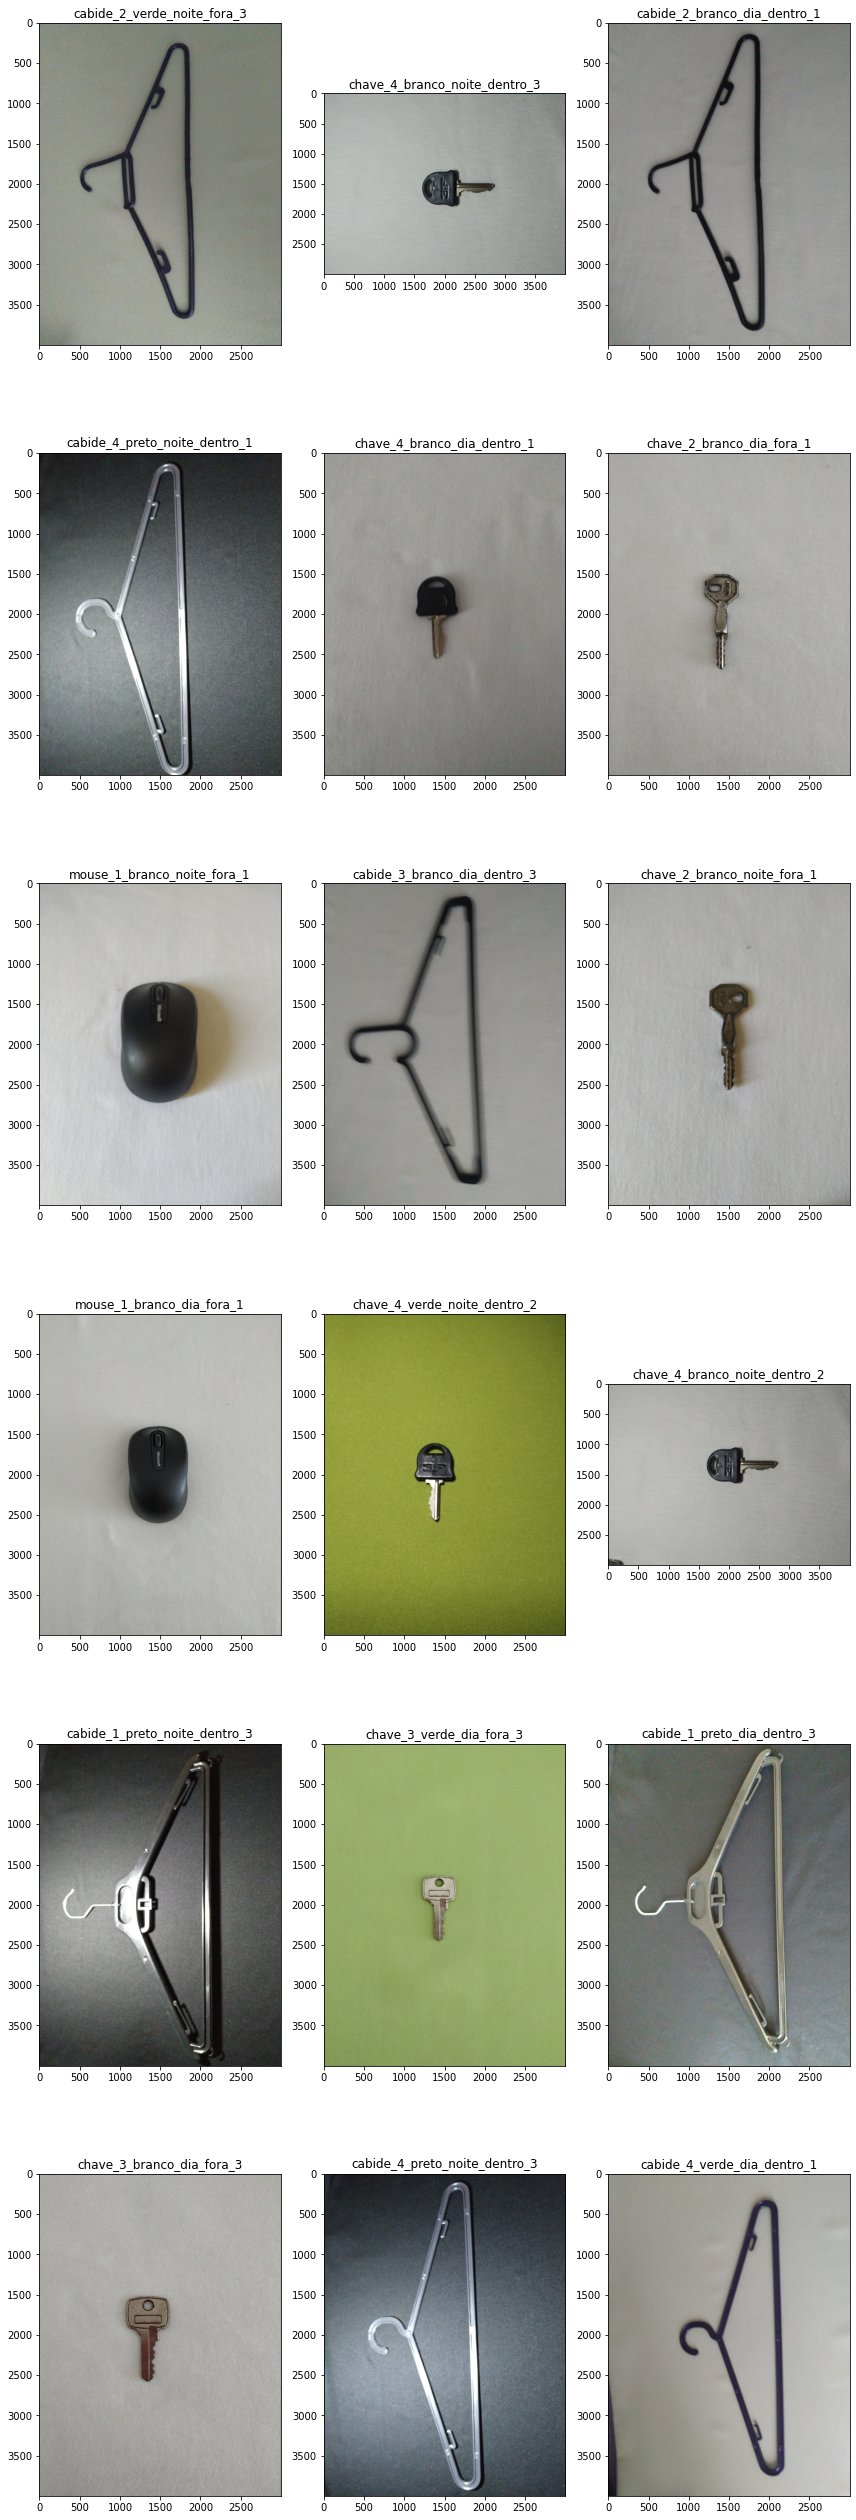

In [58]:
import matplotlib.pyplot as plt
import random
from PIL import ImageOps

num_row = 6
num_col = 3
num_img = num_col*num_row

# selecting n random images from the dataset to show
paths = []
for path, dirs, files in os.walk(IMAGES_PATH):
    for file in files:
        paths.append(os.path.join(path, file))
paths = random.sample(paths, num_img)

images = []
labels = []
for p in paths:
    images.append(ImageOps.exif_transpose(Image.open(p)))
    labels.append(p.split('/')[-1][:-4])

fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_col, 6*num_row))
for i in range(num_img):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title(labels[i])
plt.tight_layout()
plt.show()

